In [4]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import simulate as sim
import kalman as kf

from scipy.stats import norm
from matplotlib import cm
from importlib import reload
from scipy.optimize import fmin, minimize

# Simulating Data

In [5]:
# S0 = 149.54
S0 = 100
T = 30
# r = 0.0245
r = 0.2
q = 0
N = 10000

In [6]:
# true_params = [r, 3.37776282, 0.10125896, -0.32429652, -0.24495863, 0.15412752]
true_params = [r, 2.2, 0.01, 0.29, -0.3, 0.02]

In [7]:
y = sim.simulate_heston_state(true_params, S0, N=N) 

### simulate path and ekf generated path

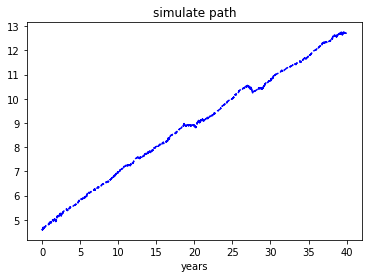

In [8]:
years = np.arange(y.shape[-1]-1) * (1/250)
plt.plot(years, y[0,1:].T, 'b--')
plt.title('simulate path')
plt.xlabel('years')
plt.show()

# neg vol: [[500]]


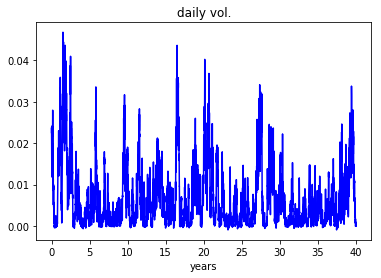

In [9]:
print("# neg vol:", sum(y[1,1:].T<0))
plt.plot(years, y[1,1:].T, 'b-')
plt.title('daily vol.')
plt.xlabel('years')
plt.show()

# EKF and Parameter Estimation

In [10]:
init_params = [0.6, 1.1, 0.03, 0.35, -0.4, 0.035]

### Initial path vs. true path

In [11]:
y_ = sim.simulate_heston_state(init_params, S0, N=N) 

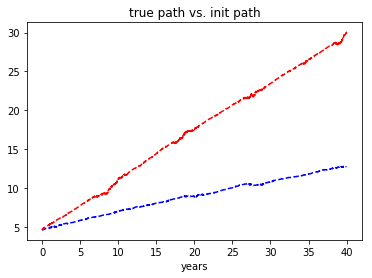

In [12]:
plt.plot(years, y[0,1:].T, 'b--')
plt.plot(years, y_[0,1:].T, 'r--')
plt.title('true path vs. init path')
plt.xlabel('years')
plt.show()

# neg vol: [[500]]


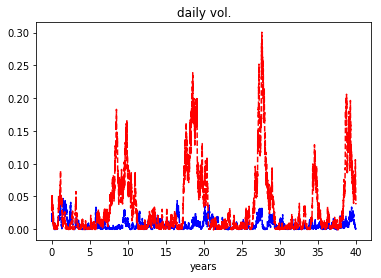

In [13]:
print("# neg vol:", sum(y[1,1:].T<0))
plt.plot(years, y[1,1:].T, 'b--')
plt.plot(years, y_[1,1:].T, 'r--')
plt.title('daily vol.')
plt.xlabel('years')
plt.show()

### Note: Optimization takes time...

In [14]:
def wrap_heston_obj(params, *args):
    y = args[0]
    S0 = args[1]
    return kf.ekf_heston_obj(y, params, S0)

In [15]:
num_iter = 1
def callbackF(xi):
    global num_iter
    global arg
    print('i: ' + str(num_iter))
    print('x_i: ' + str(xi))
    print('f_i: ' + str(wrap_heston_obj(xi, *args)))
    num_iter += 1

In [16]:
args = (y[0,:].T, S0)
maxiter = 100000

In [17]:
print("Init params: {}".format(init_params))
print("True Params: {}".format(true_params))

Init params: [0.6, 1.1, 0.03, 0.35, -0.4, 0.035]
True Params: [0.2, 2.2, 0.01, 0.29, -0.3, 0.02]


### Parameter Selection

In [18]:
def param_select(params1, params2, n_alphas=1000):
    params1 = np.array(params1)
    params2 = np.array(params2)
    alphas = np.linspace(0, 1, n_alphas)
    params = [a*params1+(1-a)*params2 for a in alphas]
    objs = [wrap_heston_obj(p, *args) for p in params]
    return objs

# This takes a long time

In [19]:
params1 = init_params
params2 = [0.3, 2.1, 0.05, 0.54, -0.1, 0.23]
# objs = param_select(params1, params2, n_alphas=100)

In [20]:
xopt, fopt, _, _, _ = fmin(wrap_heston_obj, init_params, args=args, maxiter=maxiter, callback=callbackF, 
                           disp=True, retall=False, full_output=True)

i: 1
x_i: [ 0.54      1.1275    0.03075   0.35875  -0.41      0.035875]
f_i: -8.028430143752614
i: 2
x_i: [ 0.54      1.1275    0.03075   0.35875  -0.41      0.035875]
f_i: -8.028430143752614
i: 3
x_i: [ 0.54      1.1275    0.03075   0.35875  -0.41      0.035875]
f_i: -8.028430143752614
i: 4
x_i: [ 0.54666667  1.17333333  0.02825     0.34611111 -0.40333333  0.03733333]
f_i: -8.093165863575843
i: 5
x_i: [ 0.54666667  1.17333333  0.02825     0.34611111 -0.40333333  0.03733333]
f_i: -8.093165863575843
i: 6
x_i: [ 0.49333333  1.24666667  0.0305      0.34222222 -0.40666667  0.037625  ]
f_i: -8.188519719702834
i: 7
x_i: [ 0.49333333  1.24666667  0.0305      0.34222222 -0.40666667  0.037625  ]
f_i: -8.188519719702834
i: 8
x_i: [ 0.43666667  1.26041667  0.029125    0.37090278 -0.38833333  0.0380625 ]
f_i: -8.296738945313013
i: 9
x_i: [ 0.43666667  1.26041667  0.029125    0.37090278 -0.38833333  0.0380625 ]
f_i: -8.296738945313013
i: 10
x_i: [ 0.40111111  1.38263889  0.02720833  0.33331019 -0.3

f_i: -9.365572704452823
i: 77
x_i: [-0.14983737  2.14485455  0.02931021  0.29699213 -0.33381731  0.05268593]
f_i: -9.365572704452823
i: 78
x_i: [-0.14507326  2.13698008  0.02925896  0.29926146 -0.33244351  0.05257117]
f_i: -9.366177900237599
i: 79
x_i: [-0.14507326  2.13698008  0.02925896  0.29926146 -0.33244351  0.05257117]
f_i: -9.366177900237599
i: 80
x_i: [-0.14507326  2.13698008  0.02925896  0.29926146 -0.33244351  0.05257117]
f_i: -9.366177900237599
i: 81
x_i: [-0.14507326  2.13698008  0.02925896  0.29926146 -0.33244351  0.05257117]
f_i: -9.366177900237599
i: 82
x_i: [-0.14507326  2.13698008  0.02925896  0.29926146 -0.33244351  0.05257117]
f_i: -9.366177900237599
i: 83
x_i: [-0.14380528  2.14996     0.02904737  0.29217866 -0.34181335  0.05274352]
f_i: -9.3665734852355
i: 84
x_i: [-0.14380528  2.14996     0.02904737  0.29217866 -0.34181335  0.05274352]
f_i: -9.3665734852355
i: 85
x_i: [-0.14081935  2.1421476   0.02905775  0.2962872  -0.33779273  0.0525661 ]
f_i: -9.36689980415449


f_i: -9.493418691150826
i: 152
x_i: [-0.00863214  2.94517175  0.00960225  0.06016534 -0.65706598  0.06470485]
f_i: -9.493418691150826
i: 153
x_i: [-0.00863214  2.94517175  0.00960225  0.06016534 -0.65706598  0.06470485]
f_i: -9.493418691150826
i: 154
x_i: [-0.00863214  2.94517175  0.00960225  0.06016534 -0.65706598  0.06470485]
f_i: -9.493418691150826
i: 155
x_i: [-0.00773638  2.99101565  0.00860713  0.04171539 -0.67951203  0.0657043 ]
f_i: -9.493474476541046
i: 156
x_i: [-0.00773638  2.99101565  0.00860713  0.04171539 -0.67951203  0.0657043 ]
f_i: -9.493474476541046
i: 157
x_i: [-2.67296456e-03  3.00023472e+00  8.35695420e-03  3.98074329e-02
 -6.83363628e-01  6.56811040e-02]
f_i: -9.493755540801113
i: 158
x_i: [-0.01092891  2.97339438  0.00915628  0.04744143 -0.67173873  0.06530839]
f_i: -9.493976744461921
i: 159
x_i: [ 1.94824998e-03  2.97471583e+00  8.67878327e-03  4.54788935e-02
 -6.78260179e-01  6.52589691e-02]
f_i: -9.496271432737066
i: 160
x_i: [ 1.94824998e-03  2.97471583e+00  

f_i: -9.524559239395625
i: 225
x_i: [ 0.217012    2.79745288  0.00656017  0.04603216 -0.75367891  0.05912887]
f_i: -9.524559465688453
i: 226
x_i: [ 0.21546003  2.79938197  0.00656472  0.04577333 -0.7534222   0.05918645]
f_i: -9.524560442101647
i: 227
x_i: [ 0.21546003  2.79938197  0.00656472  0.04577333 -0.7534222   0.05918645]
f_i: -9.524560442101647
i: 228
x_i: [ 0.21546003  2.79938197  0.00656472  0.04577333 -0.7534222   0.05918645]
f_i: -9.524560442101647
i: 229
x_i: [ 0.21659059  2.7986534   0.0065487   0.04534138 -0.75435056  0.05917016]
f_i: -9.524562732973429
i: 230
x_i: [ 0.21543763  2.79949237  0.00656736  0.04520393 -0.75410068  0.05920241]
f_i: -9.524563442253935
i: 231
x_i: [ 0.21543763  2.79949237  0.00656736  0.04520393 -0.75410068  0.05920241]
f_i: -9.524563442253935
i: 232
x_i: [ 0.21593524  2.79829703  0.00657608  0.04570948 -0.75367576  0.05916678]
f_i: -9.524563773132638
i: 233
x_i: [ 0.21593524  2.79829703  0.00657608  0.04570948 -0.75367576  0.05916678]
f_i: -9.52

f_i: -9.52979691161371
i: 300
x_i: [ 0.21959907  2.09724572  0.00613719  0.0522852  -0.74714154  0.0685755 ]
f_i: -9.533598809145756
i: 301
x_i: [ 0.21959907  2.09724572  0.00613719  0.0522852  -0.74714154  0.0685755 ]
f_i: -9.533598809145756
i: 302
x_i: [ 0.21959907  2.09724572  0.00613719  0.0522852  -0.74714154  0.0685755 ]
f_i: -9.533598809145756
i: 303
x_i: [ 0.22919137  1.84631388  0.00601016  0.05449673 -0.7478881   0.07150799]
f_i: -9.540680957272954
i: 304
x_i: [ 0.22919137  1.84631388  0.00601016  0.05449673 -0.7478881   0.07150799]
f_i: -9.540680957272954
i: 305
x_i: [ 0.23427555  1.47530916  0.00573537  0.05881941 -0.74449744  0.07635043]
f_i: -9.552336041848708
i: 306
x_i: [ 0.23427555  1.47530916  0.00573537  0.05881941 -0.74449744  0.07635043]
f_i: -9.552336041848708
i: 307
x_i: [ 0.23427555  1.47530916  0.00573537  0.05881941 -0.74449744  0.07635043]
f_i: -9.552336041848708
i: 308
x_i: [ 0.23892755  1.30908722  0.00566735  0.06139335 -0.74307631  0.07832089]
f_i: -9.555

f_i: -9.564494705955905
i: 375
x_i: [ 0.23877135  1.04256136  0.00507523  0.04553338 -0.7620599   0.08304244]
f_i: -9.564494705955905
i: 376
x_i: [ 0.24012637  1.06907853  0.00507181  0.04506716 -0.76308686  0.08264173]
f_i: -9.564498325712956
i: 377
x_i: [ 0.23981129  1.04780494  0.00506991  0.0450037  -0.76304509  0.08294659]
f_i: -9.564516961786378
i: 378
x_i: [ 0.23937448  1.04864741  0.00509569  0.04456855 -0.76340352  0.08294639]
f_i: -9.564551724281985
i: 379
x_i: [ 0.23937448  1.04864741  0.00509569  0.04456855 -0.76340352  0.08294639]
f_i: -9.564551724281985
i: 380
x_i: [ 0.2355734   1.06266161  0.00518501  0.04459899 -0.76201078  0.0828558 ]
f_i: -9.564661342566659
i: 381
x_i: [ 0.2355734   1.06266161  0.00518501  0.04459899 -0.76201078  0.0828558 ]
f_i: -9.564661342566659
i: 382
x_i: [ 0.2355734   1.06266161  0.00518501  0.04459899 -0.76201078  0.0828558 ]
f_i: -9.564661342566659
i: 383
x_i: [ 0.2355734   1.06266161  0.00518501  0.04459899 -0.76201078  0.0828558 ]
f_i: -9.56

f_i: -9.565424356117589
i: 450
x_i: [ 0.20359212  1.04033241  0.00629457  0.04561545 -0.74921964  0.08359214]
f_i: -9.565424356117589
i: 451
x_i: [ 0.20339269  1.04116156  0.0063041   0.04565808 -0.74909574  0.08357992]
f_i: -9.565424408593737
i: 452
x_i: [ 0.20346333  1.04044095  0.00630189  0.0456698  -0.74910687  0.08358791]
f_i: -9.56542442153954
i: 453
x_i: [ 0.20367494  1.04177655  0.00629363  0.04567916 -0.74917373  0.08356737]
f_i: -9.565424437861294
i: 454
x_i: [ 0.20367494  1.04177655  0.00629363  0.04567916 -0.74917373  0.08356737]
f_i: -9.565424437861294
i: 455
x_i: [ 0.20381194  1.04072527  0.00628984  0.04566015 -0.74924526  0.08357915]
f_i: -9.565424442326304
i: 456
x_i: [ 0.20381194  1.04072527  0.00628984  0.04566015 -0.74924526  0.08357915]
f_i: -9.565424442326304
i: 457
x_i: [ 0.20358344  1.04066657  0.00629616  0.04564832 -0.74917703  0.08358535]
f_i: -9.565424454754444
i: 458
x_i: [ 0.20349962  1.0410399   0.00630026  0.04566882 -0.74912185  0.0835797 ]
f_i: -9.565

f_i: -9.565424724493319
i: 525
x_i: [ 0.20350954  1.04115     0.00629881  0.04562134 -0.74919496  0.0835793 ]
f_i: -9.565424724493319
i: 526
x_i: [ 0.20332588  1.04071114  0.00630553  0.04561581 -0.74914174  0.0835869 ]
f_i: -9.565424817749884
i: 527
x_i: [ 0.20332588  1.04071114  0.00630553  0.04561581 -0.74914174  0.0835869 ]
f_i: -9.565424817749884
i: 528
x_i: [ 0.2034866   1.04063801  0.00630064  0.04560085 -0.74922088  0.08358493]
f_i: -9.565424870485401
i: 529
x_i: [ 0.2034866   1.04063801  0.00630064  0.04560085 -0.74922088  0.08358493]
f_i: -9.565424870485401
i: 530
x_i: [ 0.2034866   1.04063801  0.00630064  0.04560085 -0.74922088  0.08358493]
f_i: -9.565424870485401
i: 531
x_i: [ 0.2035967   1.04098228  0.00629531  0.04556279 -0.7493167   0.0835803 ]
f_i: -9.565425027596712
i: 532
x_i: [ 0.2035967   1.04098228  0.00629531  0.04556279 -0.7493167   0.0835803 ]
f_i: -9.565425027596712
i: 533
x_i: [ 0.2035967   1.04098228  0.00629531  0.04556279 -0.7493167   0.0835803 ]
f_i: -9.56

f_i: -9.565486163896354
i: 600
x_i: [ 0.2010171   1.04248892  0.00643962  0.04598245 -0.7516557   0.08306317]
f_i: -9.565486163896354
i: 601
x_i: [ 0.2010171   1.04248892  0.00643962  0.04598245 -0.7516557   0.08306317]
f_i: -9.565486163896354
i: 602
x_i: [ 0.2010171   1.04248892  0.00643962  0.04598245 -0.7516557   0.08306317]
f_i: -9.565486163896354
i: 603
x_i: [ 0.2010171   1.04248892  0.00643962  0.04598245 -0.7516557   0.08306317]
f_i: -9.565486163896354
i: 604
x_i: [ 0.2010171   1.04248892  0.00643962  0.04598245 -0.7516557   0.08306317]
f_i: -9.565486163896354
i: 605
x_i: [ 0.20131073  1.03623102  0.00643779  0.04620114 -0.75207643  0.08305545]
f_i: -9.565497598323912
i: 606
x_i: [ 0.20131073  1.03623102  0.00643779  0.04620114 -0.75207643  0.08305545]
f_i: -9.565497598323912
i: 607
x_i: [ 0.20131073  1.03623102  0.00643779  0.04620114 -0.75207643  0.08305545]
f_i: -9.565497598323912
i: 608
x_i: [ 0.20131073  1.03623102  0.00643779  0.04620114 -0.75207643  0.08305545]
f_i: -9.56

f_i: -9.570275525087785
i: 675
x_i: [ 0.16513529  0.73257998  0.00831236  0.03062754 -1.0745507   0.04858613]
f_i: -9.570826492963516
i: 676
x_i: [ 0.16513529  0.73257998  0.00831236  0.03062754 -1.0745507   0.04858613]
f_i: -9.570826492963516
i: 677
x_i: [ 0.16513529  0.73257998  0.00831236  0.03062754 -1.0745507   0.04858613]
f_i: -9.570826492963516
i: 678
x_i: [ 0.18726039  0.81569656  0.00724538  0.03334044 -1.02687545  0.05380959]
f_i: -9.571520329450227
i: 679
x_i: [ 0.18726039  0.81569656  0.00724538  0.03334044 -1.02687545  0.05380959]
f_i: -9.571520329450227
i: 680
x_i: [ 0.18726039  0.81569656  0.00724538  0.03334044 -1.02687545  0.05380959]
f_i: -9.571520329450227
i: 681
x_i: [ 0.18983095  0.76281155  0.00717857  0.03107498 -1.05409729  0.05163473]
f_i: -9.571600797427148
i: 682
x_i: [ 0.19774921  0.71339395  0.00686475  0.02887293 -1.12053876  0.04480301]
f_i: -9.572666927040823
i: 683
x_i: [ 0.2034354   0.72010364  0.00649328  0.02810224 -1.1502704   0.04154712]
f_i: -9.57

f_i: -9.57722859101428
i: 750
x_i: [ 0.2372379   0.74108852  0.00500298  0.02333188 -1.30623473  0.02429215]
f_i: -9.57722859101428
i: 751
x_i: [ 0.2372379   0.74108852  0.00500298  0.02333188 -1.30623473  0.02429215]
f_i: -9.57722859101428
i: 752
x_i: [ 0.2372379   0.74108852  0.00500298  0.02333188 -1.30623473  0.02429215]
f_i: -9.57722859101428
i: 753
x_i: [ 0.2372379   0.74108852  0.00500298  0.02333188 -1.30623473  0.02429215]
f_i: -9.57722859101428
i: 754
x_i: [ 0.2372379   0.74108852  0.00500298  0.02333188 -1.30623473  0.02429215]
f_i: -9.57722859101428
i: 755
x_i: [ 0.2372379   0.74108852  0.00500298  0.02333188 -1.30623473  0.02429215]
f_i: -9.57722859101428
i: 756
x_i: [ 0.2372379   0.74108852  0.00500298  0.02333188 -1.30623473  0.02429215]
f_i: -9.57722859101428
i: 757
x_i: [ 0.2372379   0.74108852  0.00500298  0.02333188 -1.30623473  0.02429215]
f_i: -9.57722859101428
i: 758
x_i: [ 0.2372379   0.74108852  0.00500298  0.02333188 -1.30623473  0.02429215]
f_i: -9.57722859101

f_i: -9.577236241448702
i: 825
x_i: [ 0.23816923  0.74710457  0.00496374  0.02329139 -1.30453966  0.0244623 ]
f_i: -9.577236241448702
i: 826
x_i: [ 0.23816923  0.74710457  0.00496374  0.02329139 -1.30453966  0.0244623 ]
f_i: -9.577236241448702
i: 827
x_i: [ 0.23816923  0.74710457  0.00496374  0.02329139 -1.30453966  0.0244623 ]
f_i: -9.577236241448702
i: 828
x_i: [ 0.23816923  0.74710457  0.00496374  0.02329139 -1.30453966  0.0244623 ]
f_i: -9.577236241448702
i: 829
x_i: [ 0.2381811   0.74708871  0.00496325  0.02329519 -1.30450748  0.02446622]
f_i: -9.577236241910455
i: 830
x_i: [ 0.2381811   0.74708871  0.00496325  0.02329519 -1.30450748  0.02446622]
f_i: -9.577236241910455
i: 831
x_i: [ 0.23819043  0.74718478  0.004963    0.02329423 -1.3045465   0.02446051]
f_i: -9.577236242186693
i: 832
x_i: [ 0.23819043  0.74718478  0.004963    0.02329423 -1.3045465   0.02446051]
f_i: -9.577236242186693
i: 833
x_i: [ 0.2381859   0.74710962  0.00496327  0.02329565 -1.30453513  0.0244624 ]
f_i: -9.57

In [21]:
print("Optimal params: {}".format(xopt))
print("True Params: {}".format(true_params))

Optimal params: [ 0.2381859   0.74710962  0.00496327  0.02329565 -1.30453513  0.0244624 ]
True Params: [0.2, 2.2, 0.01, 0.29, -0.3, 0.02]


In [22]:
y_ = sim.simulate_heston_state(xopt, S0, N=N) 

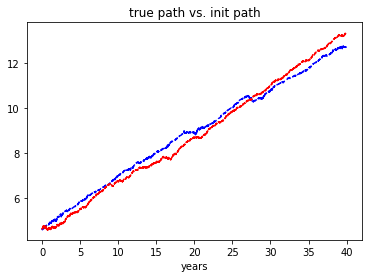

In [23]:
plt.plot(years, y[0,1:].T, 'b--')
plt.plot(years, y_[0,1:].T, 'r--')
plt.title('true path vs. init path')
plt.xlabel('years')
plt.show()

# neg vol: [[500]]


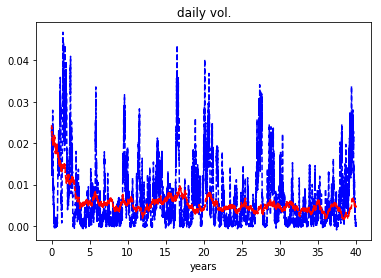

In [24]:
print("# neg vol:", sum(y[1,1:].T<0))
plt.plot(years, y[1,1:].T, 'b--')
plt.plot(years, y_[1,1:].T, 'r--')
plt.title('daily vol.')
plt.xlabel('years')
plt.show()